In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#setting display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('max_colwidth', 400)
np.set_printoptions(linewidth =500)
%matplotlib inline
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data = pd.read_csv('Train.csv');train_data.head(3)

In [610]:
test_data= pd.read_csv(r'C:\Users\aadegunle\OneDrive - axamansard.com\Zindi_pro\WIDS\Test.csv');test_data.head(2)

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,0.013018,0.003516,0.000000,0.000668,0.002078,0.0,0.0,0.246694,0.615326,0.000000,0.016724,0.121257,0.155406,0.844594,0.216589,0.783411,0.173569,0.826431,0.817552,0.022885,0.000643,0.125655,0.000400,0.000125,0.002761,0.006069,0.000384,0.000131,0.000259,0.0,0.004612,0.0,0.018525,0.173136,0.736099,0.003712,0.083467,0.003586,0.921001,0.551691,0.427445,0.012457,0.001757,0.0,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.0
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,0.022412,0.016969,0.006702,0.006492,0.006853,0.0,0.0,0.193484,0.532209,0.000936,0.052571,0.220800,0.406129,0.593871,0.498555,0.501445,0.366732,0.633268,0.434771,0.106254,0.000439,0.289230,0.001222,0.001483,0.002284,0.003142,0.001063,0.000162,0.000000,0.0,0.005779,0.0,0.154172,0.471349,0.191902,0.002854,0.324584,0.009311,0.955494,0.759594,0.227192,0.009606,0.000691,0.0,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.0


In [611]:
descr= pd.read_csv(r'C:\Users\aadegunle\OneDrive - axamansard.com\Zindi_pro\WIDS\variable_descriptions.csv');descr
#expore from stv

,Column,Description,Unnamed: 2,Unnamed: 3
0,dw_00,Percentage of dwellings of type: House or bric...,NaN,NaN
1,dw_01,Percentage of dwellings of type: Traditional d...,NaN,NaN
2,dw_02,Percentage of dwellings of type: Flat or apart...,NaN,NaN
3,dw_03,Percentage of dwellings of type: Cluster house...,NaN,NaN
4,dw_04,Percentage of dwellings of type: Townhouse (se...,NaN,NaN
5,dw_05,Percentage of dwellings of type: Semi-detached...,NaN,NaN
6,dw_06,Percentage of dwellings of type: House/flat/ro...,NaN,NaN
7,dw_07,Percentage of dwellings of type: Informal dwel...,in backyard),NaN
8,dw_08,Percentage of dwellings of type: Informal dwel...,not in backyard,e.g. in an informal/squatter settlement or on...
9,dw_09,Percentage of dwellings of type: Room/flatlet ...,NaN,NaN


In [612]:
#group the data by bins of .2 degrees
step = 0.2
to_bin = lambda x: np.floor(x / step) * step
test_data["latbin"] = test_data.lat.map(to_bin)
test_data["lonbin"] = test_data.lon.map(to_bin)
groups = test_data.groupby(("latbin", "lonbin"))

In [613]:
#group the data by bins of .2 degrees
step = 0.2
to_bin = lambda x: np.floor(x / step) * step
train_data["latbin"] = train_data.lat.map(to_bin)
train_data["lonbin"] = train_data.lon.map(to_bin)
groups = train_data.groupby(("latbin", "lonbin"))

In [614]:
train_data.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL,latbin,lonbin
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0,0,0.260191,0.607898,0.000188,0.010018,0.121705,0.283468,0.716532,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039,-29.8,24.6
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0,0,0.290228,0.549788,0.000000,0.021336,0.138647,0.103641,0.896359,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775,-29.2,24.6
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0,0,0.186435,0.677005,0.000489,0.021315,0.114757,0.165772,0.834228,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000,-29.2,25.0
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0,0,0.281229,0.593281,0.000579,0.007249,0.117663,0.087768,0.912232,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778,-29.4,24.8
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0,0,0.196687,0.517578,0.000989,0.005148,0.279598,0.345975,0.654025,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000,-29.6,25.2


In [615]:
train_data['A'], train_data['B'] = train_data['ward'].str.split(':', 1).str
test_data['A'], test_data['B'] = test_data['ward'].str.split(':', 1).str

In [616]:
train_data.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL,latbin,lonbin,A,B
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0,0,0.260191,0.607898,0.000188,0.010018,0.121705,0.283468,0.716532,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039,-29.8,24.6,41601001,Ward 1
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0,0,0.290228,0.549788,0.000000,0.021336,0.138647,0.103641,0.896359,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775,-29.2,24.6,41601002,Ward 2
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0,0,0.186435,0.677005,0.000489,0.021315,0.114757,0.165772,0.834228,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000,-29.2,25.0,41601003,Ward 3
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0,0,0.281229,0.593281,0.000579,0.007249,0.117663,0.087768,0.912232,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778,-29.4,24.8,41601004,Ward 4
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0,0,0.196687,0.517578,0.000989,0.005148,0.279598,0.345975,0.654025,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000,-29.6,25.2,41601005,Ward 5


In [617]:
train_data['Bcounts'] = train_data['B'].map(train_data['B'].value_counts().to_dict())
test_data['Bcounts'] = test_data['B'].map(test_data['B'].value_counts().to_dict())

In [618]:
train_data[['lln_00', 'lln_01']].head(3) #household % with satelite tv

,lln_00,lln_01
0,0.118825,0.881175
1,0.066903,0.933097
2,0.100009,0.899991


In [619]:
train_data['lan_01'].max()

0.9395492467000001

In [620]:
train_data['dx/stv'] =train_data['stv_01'] - train_data['stv_00']
train_data['dx/car'] =train_data['car_00'] - train_data['car_01']
train_data['dx/lln'] =train_data['lln_00'] - train_data['lln_01']

In [621]:
test_data['dx/stv'] =test_data['stv_01'] - test_data['stv_00']
test_data['dx/car'] =test_data['car_00'] - test_data['car_01']
test_data['dx/lln'] =test_data['lln_00'] - test_data['lln_01']

In [622]:
#drop 0-6
train_data['dx/pw_00'] =(train_data['pw_00'] + train_data['pw_01'] + train_data['pw_02'] + train_data['pw_03'] + train_data['pw_04'] + train_data['pw_05'])/6

In [623]:
#drop 0-6
test_data['dx/pw_00'] =(test_data['pw_00'] + test_data['pw_01'] + test_data['pw_02'] + test_data['pw_03'] + test_data['pw_04'] + test_data['pw_05'])/6

In [624]:
train_data['dx/eng_lan'] =train_data['lan_01'] - (train_data['lan_00'] +train_data['lan_02'] + train_data['lan_03']+ train_data['lan_04']+ train_data['lan_05']+ train_data['lan_06']+ train_data['lan_07']+ train_data['lan_08']+ train_data['lan_09']+ train_data['lan_10']++ train_data['lan_11']+ train_data['lan_12']+ train_data['lan_14'])

In [625]:
test_data['dx/eng_lan'] =test_data['lan_01'] - (test_data['lan_00'] +test_data['lan_02'] + test_data['lan_03']+ test_data['lan_04']+ test_data['lan_05']+ test_data['lan_06']+ test_data['lan_07']+ test_data['lan_08']+ test_data['lan_09']+ test_data['lan_10']++ test_data['lan_11']+ test_data['lan_12']+ test_data['lan_14'])

In [626]:
train_data=train_data.drop(train_data.index[1815])

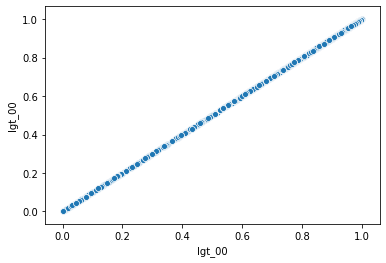

In [627]:
sns.scatterplot(x='lgt_00', y='lgt_00', data=train_data)

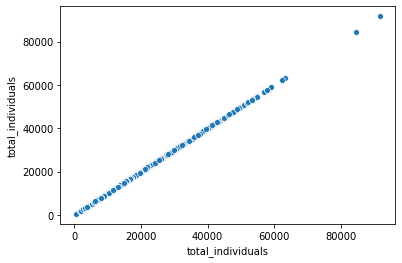

In [628]:
sns.scatterplot(x='total_individuals', y='total_individuals', data=train_data)

In [629]:
train_data[train_data['ward'] == '93601011: Ward 11']

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL,latbin,lonbin,A,B,Bcounts,dx/stv,dx/car,dx/lln,dx/pw_00,dx/eng_lan


In [630]:
train_data.shape

(2821, 73)

In [631]:
Samplesub = pd.read_csv(r'C:\Users\aadegunle\OneDrive - axamansard.com\Zindi_pro\WIDS\SampleSubmission.csv');Samplesub.head()

,ward,target
0,21001001: Ward 1,21.87
1,21001002: Ward 2,65.94
2,21001003: Ward 3,83.65
3,21001004: Ward 4,NaN
4,21001005: Ward 5,NaN


In [632]:
# Strong +ve correlations
train_data.corr()['target'].sort_values(ascending=False).head(10)

target    1.000000
psa_00    0.782119
car_01    0.704840
dx/stv    0.666148
stv_01    0.666148
lln_01    0.639169
pg_00     0.614288
pw_06     0.470674
dw_01     0.458260
pw_02     0.450090
Name: target, dtype: float64

In [633]:
# Strong -ve correlations
train_data.corr()['target'].sort_values().head(10)

pw_00    -0.756481
psa_01   -0.718300
dx/car   -0.704840
car_00   -0.704840
stv_00   -0.666148
lln_00   -0.639169
dx/lln   -0.639169
pg_03    -0.584779
NL       -0.515213
lan_00   -0.508878
Name: target, dtype: float64

In [634]:
len_train= len(train_data)
new_df = pd.concat([train_data, test_data])

In [635]:
new_df.head()

,A,ADM4_PCODE,B,Bcounts,NL,car_00,car_01,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,dx/car,dx/eng_lan,dx/lln,dx/pw_00,dx/stv,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,lat,latbin,lgt_00,lln_00,lln_01,lon,lonbin,pg_00,pg_01,pg_02,pg_03,pg_04,psa_00,psa_01,psa_02,psa_03,psa_04,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,stv_00,stv_01,target,total_households,total_individuals,ward
0,41601001,ZA4161001,Ward 1,144,0.292039,0.273727,0.726273,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0.0,0.0,-0.452545,-0.975327,-0.762351,0.164512,0.433065,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0.0,0.006793,-29.682270,-29.8,0.919424,0.118825,0.881175,24.734743,24.6,0.357455,0.563166,0.004260,0.072996,0.002123,0.260191,0.607898,0.000188,0.010018,0.121705,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0.0,0.0,0.283468,0.716532,16.773757,1674.45058,5888.20750,41601001: Ward 1
1,41601002,ZA4161002,Ward 2,144,3.207775,0.144638,0.855362,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0.0,0.0,-0.710724,-0.983110,-0.866193,0.165978,0.792718,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0.0,0.028061,-29.119311,-29.2,0.959259,0.066903,0.933097,24.757737,24.6,0.698428,0.278006,0.003695,0.015835,0.004036,0.290228,0.549788,0.000000,0.021336,0.138647,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0.0,0.0,0.103641,0.896359,21.496661,1736.99230,6735.33812,41601002: Ward 2
2,41601003,ZA4161003,Ward 3,144,0.000000,0.272220,0.727780,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0.0,0.0,-0.455560,-0.968018,-0.799983,0.159853,0.668457,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0.0,0.002200,-29.142276,-29.2,0.826164,0.100009,0.899991,25.094093,25.0,0.672452,0.154225,0.002181,0.167494,0.003649,0.186435,0.677005,0.000489,0.021315,0.114757,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0.0,0.0,0.165772,0.834228,10.931425,2403.57591,7273.04995,41601003: Ward 3
3,41601004,ZA4161004,Ward 4,144,2.038778,0.127875,0.872125,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0.0,0.0,-0.744249,-0.986939,-0.941689,0.165832,0.824464,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0.0,0.000174,-29.372052,-29.4,0.986151,0.029155,0.970845,24.942867,24.8,0.728014,0.263831,0.001806,0.000956,0.005393,0.281229,0.593281,0.000579,0.007249,0.117663,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0.0,0.0,0.087768,0.912232,23.119257,1740.78737,5734.49046,41601004: Ward 4
4,41601005,ZA4161005,Ward 5,129,0.000000,0.404507,0.595493,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0.0,0.0,-0.190986,-0.971296,-0.732896,0.163728,0.308050,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0.0,0.192272,-29.409381,-29.6,0.957376,0.133552,0.866448,25.290165,25.2,0.753491,0.129654,0.004523,0.106953,0.005380,0.196687,0.517578,0.000989,0.005148,0.279598,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0.0,0.0,0.345975,0.654025,13.652252,1730.51451,6657.23835,41601005: Ward 5


In [636]:
new_df = new_df.drop('ADM4_PCODE', axis=1)

In [637]:
new_df.head()

,A,B,Bcounts,NL,car_00,car_01,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,dx/car,dx/eng_lan,dx/lln,dx/pw_00,dx/stv,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,lat,latbin,lgt_00,lln_00,lln_01,lon,lonbin,pg_00,pg_01,pg_02,pg_03,pg_04,psa_00,psa_01,psa_02,psa_03,psa_04,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,stv_00,stv_01,target,total_households,total_individuals,ward
0,41601001,Ward 1,144,0.292039,0.273727,0.726273,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0.0,0.0,-0.452545,-0.975327,-0.762351,0.164512,0.433065,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0.0,0.006793,-29.682270,-29.8,0.919424,0.118825,0.881175,24.734743,24.6,0.357455,0.563166,0.004260,0.072996,0.002123,0.260191,0.607898,0.000188,0.010018,0.121705,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0.0,0.0,0.283468,0.716532,16.773757,1674.45058,5888.20750,41601001: Ward 1
1,41601002,Ward 2,144,3.207775,0.144638,0.855362,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0.0,0.0,-0.710724,-0.983110,-0.866193,0.165978,0.792718,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0.0,0.028061,-29.119311,-29.2,0.959259,0.066903,0.933097,24.757737,24.6,0.698428,0.278006,0.003695,0.015835,0.004036,0.290228,0.549788,0.000000,0.021336,0.138647,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0.0,0.0,0.103641,0.896359,21.496661,1736.99230,6735.33812,41601002: Ward 2
2,41601003,Ward 3,144,0.000000,0.272220,0.727780,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0.0,0.0,-0.455560,-0.968018,-0.799983,0.159853,0.668457,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0.0,0.002200,-29.142276,-29.2,0.826164,0.100009,0.899991,25.094093,25.0,0.672452,0.154225,0.002181,0.167494,0.003649,0.186435,0.677005,0.000489,0.021315,0.114757,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0.0,0.0,0.165772,0.834228,10.931425,2403.57591,7273.04995,41601003: Ward 3
3,41601004,Ward 4,144,2.038778,0.127875,0.872125,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0.0,0.0,-0.744249,-0.986939,-0.941689,0.165832,0.824464,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0.0,0.000174,-29.372052,-29.4,0.986151,0.029155,0.970845,24.942867,24.8,0.728014,0.263831,0.001806,0.000956,0.005393,0.281229,0.593281,0.000579,0.007249,0.117663,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0.0,0.0,0.087768,0.912232,23.119257,1740.78737,5734.49046,41601004: Ward 4
4,41601005,Ward 5,129,0.000000,0.404507,0.595493,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0.0,0.0,-0.190986,-0.971296,-0.732896,0.163728,0.308050,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0.0,0.192272,-29.409381,-29.6,0.957376,0.133552,0.866448,25.290165,25.2,0.753491,0.129654,0.004523,0.106953,0.005380,0.196687,0.517578,0.000989,0.005148,0.279598,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0.0,0.0,0.345975,0.654025,13.652252,1730.51451,6657.23835,41601005: Ward 5


In [638]:
new_df.dtypes

A                     object
B                     object
Bcounts                int64
NL                   float64
car_00               float64
car_01               float64
dw_00                float64
dw_01                float64
dw_02                float64
dw_03                float64
dw_04                float64
dw_05                float64
dw_06                float64
dw_07                float64
dw_08                float64
dw_09                float64
dw_10                float64
dw_11                float64
dw_12                float64
dw_13                float64
dx/car               float64
dx/eng_lan           float64
dx/lln               float64
dx/pw_00             float64
dx/stv               float64
lan_00               float64
lan_01               float64
lan_02               float64
lan_03               float64
lan_04               float64
lan_05               float64
lan_06               float64
lan_07               float64
lan_08               float64
lan_09        

In [639]:
new_df =new_df[['Bcounts', 'NL', 'car_00', 'car_01', 'dw_00', 'dw_01',
       'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09',
       'dw_10', 'dw_11', 'dw_12', 'dw_13', 'dx/car', 'dx/eng_lan', 'dx/lln',
       'dx/pw_00', 'dx/stv', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04',
       'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
       'lan_12', 'lan_13', 'lan_14', 'lat', 'latbin', 'lgt_00', 'lln_00',
       'lln_01', 'lon', 'lonbin', 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04',
       'psa_00', 'psa_01', 'psa_02', 'psa_03', 'psa_04', 'pw_00', 'pw_01',
       'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06', 'pw_07', 'pw_08', 'stv_00',
       'stv_01', 'target', 'total_households', 'total_individuals', 'ward']]

In [640]:
new_df.columns

Index(['Bcounts', 'NL', 'car_00', 'car_01', 'dw_00', 'dw_01', 'dw_02', 'dw_03',
       'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_10', 'dw_11',
       'dw_12', 'dw_13', 'dx/car', 'dx/eng_lan', 'dx/lln', 'dx/pw_00',
       'dx/stv', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05',
       'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11', 'lan_12',
       'lan_13', 'lan_14', 'lat', 'latbin', 'lgt_00', 'lln_00', 'lln_01',
       'lon', 'lonbin', 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04', 'psa_00',
       'psa_01', 'psa_02', 'psa_03', 'psa_04', 'pw_00', 'pw_01', 'pw_02',
       'pw_03', 'pw_04', 'pw_05', 'pw_06', 'pw_07', 'pw_08', 'stv_00',
       'stv_01', 'target', 'total_households', 'total_individuals', 'ward'],
      dtype='object')

In [641]:
train = new_df[:len_train]
test = new_df[len_train:]
test.drop("target",axis=1, inplace=True)

In [647]:
train = train[['latbin', 'lonbin', 'pg_00',
       'pg_01', 'pg_02', 'pg_03', 'pg_04', 'psa_00', 'psa_01', 'psa_02',
       'psa_03', 'psa_04', 'target',
       'total_households', 'total_individuals', 'ward','Bcounts','NL', 'dx/car', 'dx/eng_lan', 'dx/lln', 'dx/pw_00'
         ,'dx/stv', 'car_01', 'dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04',
       'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_10', 'dw_11',  'lat', 'lgt_00']]#, 'stv_00'

In [649]:
test = test[['latbin', 'lonbin', 'pg_00',
       'pg_01', 'pg_02', 'pg_03', 'pg_04', 'psa_00', 'psa_01', 'psa_02',
       'psa_03', 'psa_04', 
       'total_households', 'total_individuals', 'ward','Bcounts','NL', 'dx/car', 'dx/eng_lan', 'dx/lln', 'dx/pw_00'
         ,'dx/stv', 'car_01', 'dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04',
       'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_10', 'dw_11',  'lat', 'lgt_00']]

In [651]:
train.shape,test.shape

((2821, 38), (1013, 37))

In [652]:
train.head()

,latbin,lonbin,pg_00,pg_01,pg_02,pg_03,pg_04,psa_00,psa_01,psa_02,psa_03,psa_04,target,total_households,total_individuals,ward,Bcounts,NL,dx/car,dx/eng_lan,dx/lln,dx/pw_00,dx/stv,car_01,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,lat,lgt_00
0,-29.8,24.6,0.357455,0.563166,0.004260,0.072996,0.002123,0.260191,0.607898,0.000188,0.010018,0.121705,16.773757,1674.45058,5888.20750,41601001: Ward 1,144,0.292039,-0.452545,-0.975327,-0.762351,0.164512,0.433065,0.726273,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,-29.682270,0.919424
1,-29.2,24.6,0.698428,0.278006,0.003695,0.015835,0.004036,0.290228,0.549788,0.000000,0.021336,0.138647,21.496661,1736.99230,6735.33812,41601002: Ward 2,144,3.207775,-0.710724,-0.983110,-0.866193,0.165978,0.792718,0.855362,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,-29.119311,0.959259
2,-29.2,25.0,0.672452,0.154225,0.002181,0.167494,0.003649,0.186435,0.677005,0.000489,0.021315,0.114757,10.931425,2403.57591,7273.04995,41601003: Ward 3,144,0.000000,-0.455560,-0.968018,-0.799983,0.159853,0.668457,0.727780,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,-29.142276,0.826164
3,-29.4,24.8,0.728014,0.263831,0.001806,0.000956,0.005393,0.281229,0.593281,0.000579,0.007249,0.117663,23.119257,1740.78737,5734.49046,41601004: Ward 4,144,2.038778,-0.744249,-0.986939,-0.941689,0.165832,0.824464,0.872125,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,-29.372052,0.986151
4,-29.6,25.2,0.753491,0.129654,0.004523,0.106953,0.005380,0.196687,0.517578,0.000989,0.005148,0.279598,13.652252,1730.51451,6657.23835,41601005: Ward 5,129,0.000000,-0.190986,-0.971296,-0.732896,0.163728,0.308050,0.595493,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,-29.409381,0.957376


In [653]:
target= train["target"]
train =train.drop(["ward"], axis=1)
test_id = Samplesub["ward"]
test= test.drop(["ward"], axis=1)

In [654]:
train.head()

,latbin,lonbin,pg_00,pg_01,pg_02,pg_03,pg_04,psa_00,psa_01,psa_02,psa_03,psa_04,target,total_households,total_individuals,Bcounts,NL,dx/car,dx/eng_lan,dx/lln,dx/pw_00,dx/stv,car_01,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,lat,lgt_00
0,-29.8,24.6,0.357455,0.563166,0.004260,0.072996,0.002123,0.260191,0.607898,0.000188,0.010018,0.121705,16.773757,1674.45058,5888.20750,144,0.292039,-0.452545,-0.975327,-0.762351,0.164512,0.433065,0.726273,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,-29.682270,0.919424
1,-29.2,24.6,0.698428,0.278006,0.003695,0.015835,0.004036,0.290228,0.549788,0.000000,0.021336,0.138647,21.496661,1736.99230,6735.33812,144,3.207775,-0.710724,-0.983110,-0.866193,0.165978,0.792718,0.855362,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,-29.119311,0.959259
2,-29.2,25.0,0.672452,0.154225,0.002181,0.167494,0.003649,0.186435,0.677005,0.000489,0.021315,0.114757,10.931425,2403.57591,7273.04995,144,0.000000,-0.455560,-0.968018,-0.799983,0.159853,0.668457,0.727780,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,-29.142276,0.826164
3,-29.4,24.8,0.728014,0.263831,0.001806,0.000956,0.005393,0.281229,0.593281,0.000579,0.007249,0.117663,23.119257,1740.78737,5734.49046,144,2.038778,-0.744249,-0.986939,-0.941689,0.165832,0.824464,0.872125,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,-29.372052,0.986151
4,-29.6,25.2,0.753491,0.129654,0.004523,0.106953,0.005380,0.196687,0.517578,0.000989,0.005148,0.279598,13.652252,1730.51451,6657.23835,129,0.000000,-0.190986,-0.971296,-0.732896,0.163728,0.308050,0.595493,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,-29.409381,0.957376


In [655]:
from sklearn.preprocessing import StandardScaler

In [656]:
train['total_households'] = StandardScaler().fit_transform(train['total_households'].values.reshape(-1,1))
train['total_individuals'] = StandardScaler().fit_transform(train['total_individuals'].values.reshape(-1,1))

In [657]:
test['total_households'] = StandardScaler().fit_transform(test['total_households'].values.reshape(-1,1))
test['total_individuals'] = StandardScaler().fit_transform(test['total_individuals'].values.reshape(-1,1))

In [658]:
train.columns

Index(['latbin', 'lonbin', 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04',
       'psa_00', 'psa_01', 'psa_02', 'psa_03', 'psa_04', 'target',
       'total_households', 'total_individuals', 'Bcounts', 'NL', 'dx/car',
       'dx/eng_lan', 'dx/lln', 'dx/pw_00', 'dx/stv', 'car_01', 'dw_00',
       'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08',
       'dw_09', 'dw_10', 'dw_11', 'lat', 'lgt_00'],
      dtype='object')

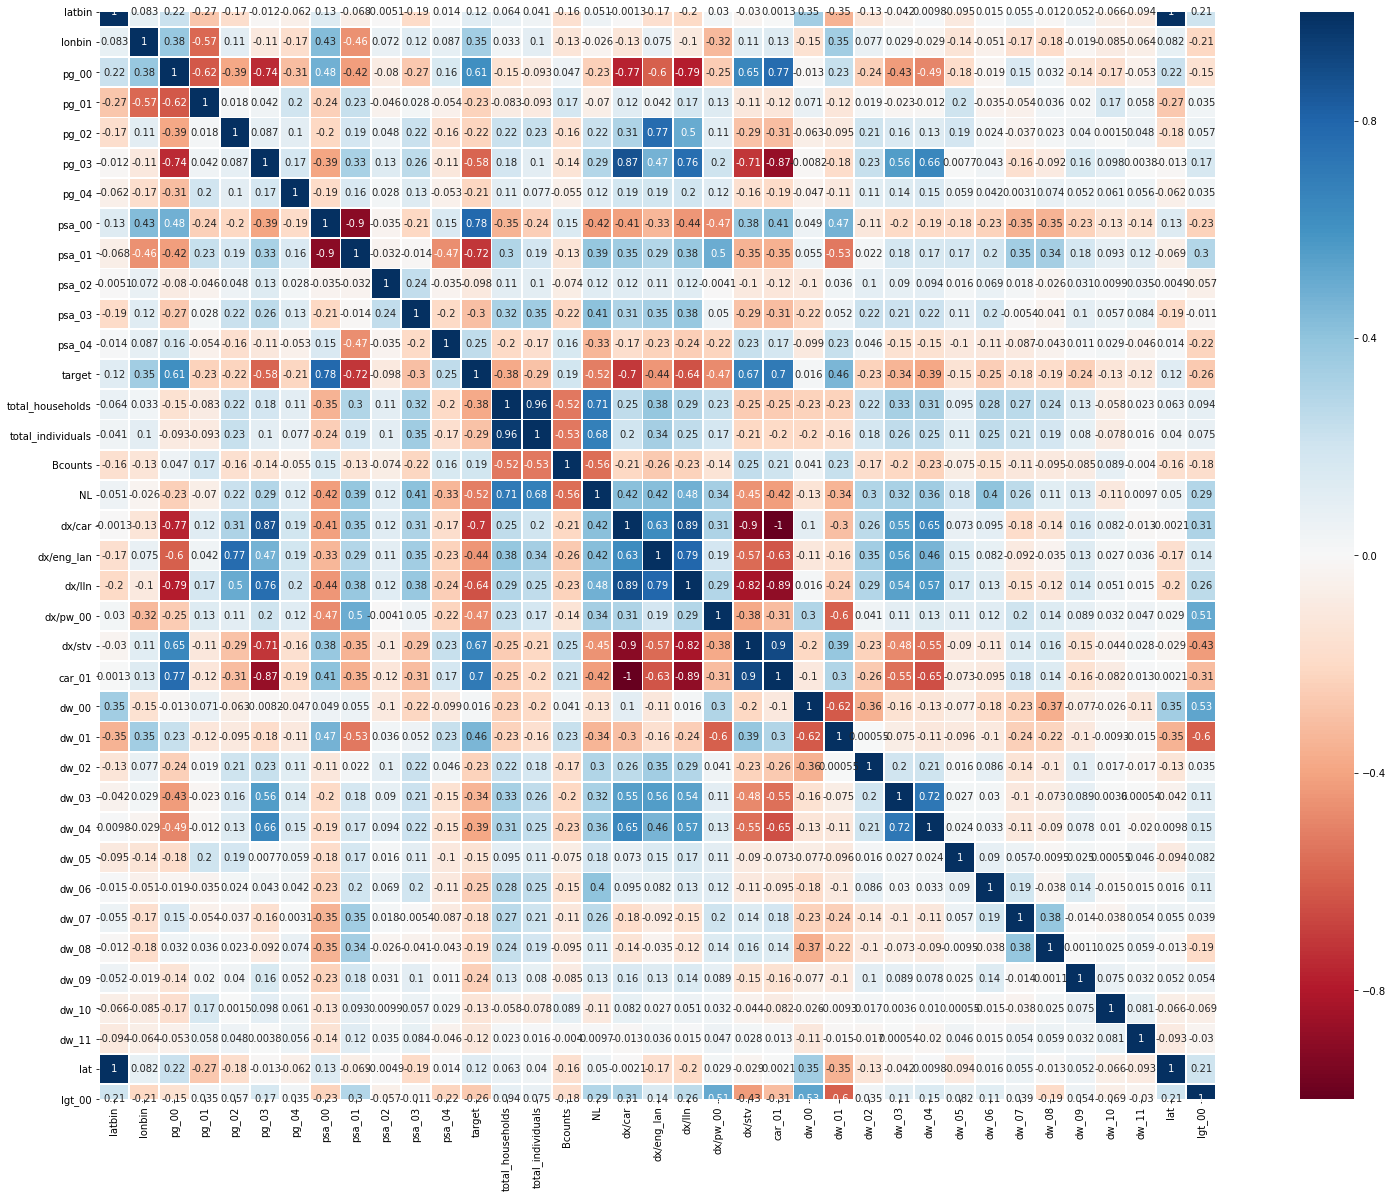

In [659]:
#correlelogram- plot heatmap to find correlation among features
corrmat =train.corr()
f, ax = plt.subplots(figsize=(30,20))
sns.heatmap(corrmat, square=True, annot=True,linewidth=0.8, cmap='RdBu')

In [660]:
train.columns

Index(['latbin', 'lonbin', 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04',
       'psa_00', 'psa_01', 'psa_02', 'psa_03', 'psa_04', 'target',
       'total_households', 'total_individuals', 'Bcounts', 'NL', 'dx/car',
       'dx/eng_lan', 'dx/lln', 'dx/pw_00', 'dx/stv', 'car_01', 'dw_00',
       'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08',
       'dw_09', 'dw_10', 'dw_11', 'lat', 'lgt_00'],
      dtype='object')

In [661]:
test.columns

Index(['latbin', 'lonbin', 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04',
       'psa_00', 'psa_01', 'psa_02', 'psa_03', 'psa_04', 'total_households',
       'total_individuals', 'Bcounts', 'NL', 'dx/car', 'dx/eng_lan', 'dx/lln',
       'dx/pw_00', 'dx/stv', 'car_01', 'dw_00', 'dw_01', 'dw_02', 'dw_03',
       'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_10', 'dw_11',
       'lat', 'lgt_00'],
      dtype='object')

In [662]:
train.drop(['target'], axis=True, inplace=True)

In [663]:
X = train
y = target

In [664]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.75, random_state=1999)

In [665]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [667]:
from catboost import CatBoostRegressor

In [669]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
errcb1=[]
y_pred_totcb1=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
fold=KFold(n_splits=31)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
   
    m1=CatBoostRegressor(n_estimators=1000,eval_metric='RMSE',max_depth=4,learning_rate=0.21,random_state=33,
                     use_best_model=True)
    m1.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m1.predict(X_test)
    print("err: ",sqrt(mean_squared_error(y_test,preds)))
    errcb1.append(sqrt(mean_squared_error(y_test,preds)))
    p1 = m1.predict(test)
    y_pred_totcb1.append(p1)

0:	learn: 22.0298193	test: 22.0298193	test1: 18.4417945	best: 18.4417945 (0)	total: 20.3ms	remaining: 20.3s
100:	learn: 3.0622569	test: 3.0622569	test1: 4.5133602	best: 4.4980076 (94)	total: 1.53s	remaining: 13.7s
200:	learn: 2.7109478	test: 2.7109478	test1: 4.4423902	best: 4.3980740 (172)	total: 2.96s	remaining: 11.8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 4.398074003
bestIteration = 172

Shrink model to first 173 iterations.
err:  4.398073976576607
0:	learn: 22.1345014	test: 22.1345014	test1: 16.9792889	best: 16.9792889 (0)	total: 25ms	remaining: 25s
100:	learn: 3.1598607	test: 3.1598607	test1: 2.9030709	best: 2.8996679 (99)	total: 1.58s	remaining: 14s
200:	learn: 2.8071975	test: 2.8071975	test1: 2.8601221	best: 2.8302200 (162)	total: 3.07s	remaining: 12.2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 2.83022002
bestIteration = 162

Shrink model to first 163 iterations.
err:  2.8302200277471115
0:	learn: 20.5030146	test: 20.5030146	te

In [670]:
np.mean(errcb1)

4.141977656376741

In [671]:
d = {"ward": test_id, 'target': np.mean(y_pred_totcb1, 0)}
test_predictioned = pd.DataFrame(data=d)
test_predictioned = test_predictioned[["ward", 'target']]

In [672]:
test_predictioned.head()

,ward,target
0,21001001: Ward 1,18.135984
1,21001002: Ward 2,11.482718
2,21001003: Ward 3,20.921533
3,21001004: Ward 4,16.480192
4,21001005: Ward 5,21.014218


In [673]:
test_predictioned.to_csv('joko5.csv', index=False)

In [180]:
a.head()

,ward,target
0,21001001: Ward 1,18.654799
1,21001002: Ward 2,12.182807
2,21001003: Ward 3,19.597931
3,21001004: Ward 4,16.839617
4,21001005: Ward 5,21.061587


In [181]:
a.target = 0.9*a.target + 0.1*b.target

In [182]:
a.head()

,ward,target
0,21001001: Ward 1,18.610609
1,21001002: Ward 2,12.276093
2,21001003: Ward 3,19.772881
3,21001004: Ward 4,16.939728
4,21001005: Ward 5,21.096164


In [183]:
a.to_csv('mystack62xx.csv', index=False)#submit